# Prepare Functions
Functions to create:
- splitting into train, validate, test
- scale train, validate, test
- create clusters with kmeans

### Skip to:
- [converting time](#convert-time)
- [lowercase text](#lower-text)
- [is_featured_artist feature](#feat-artist)
- [split](#split-data)
- [scale](#scale-data)
- [cluster](#cluster-data)
- [combine csv files into one](#combine-csv)

In [1]:
import prepare
import preprocessing

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_colwidth", 10000)

In [3]:
df = pd.read_csv('playlist-offset-0-2700.csv', index_col=0)

In [4]:
df.shape

(2800, 20)

## Looking at the Data - Univariate Analysis Before Splitting

In [5]:
df = df.dropna()

In [6]:
df.shape

(2799, 20)

In [7]:
df.head(5)

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2.0,-8.544,1.0,0.3000,0.000000,0.244,0.351,82.512,232803.0,4.0,True,43.0,1.0
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9.0,-6.912,1.0,0.2330,0.000000,0.114,0.265,148.077,193920.0,4.0,True,61.0,1.0
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0.0,-6.450,0.0,0.1450,0.000000,0.409,0.717,160.011,254390.0,4.0,True,22.0,1.0
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0.0,-4.783,0.0,0.1080,0.000000,0.364,0.771,140.059,250493.0,4.0,True,62.0,1.0
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11.0,-5.470,0.0,0.0773,0.000001,0.106,0.800,160.003,261933.0,4.0,True,45.0,1.0


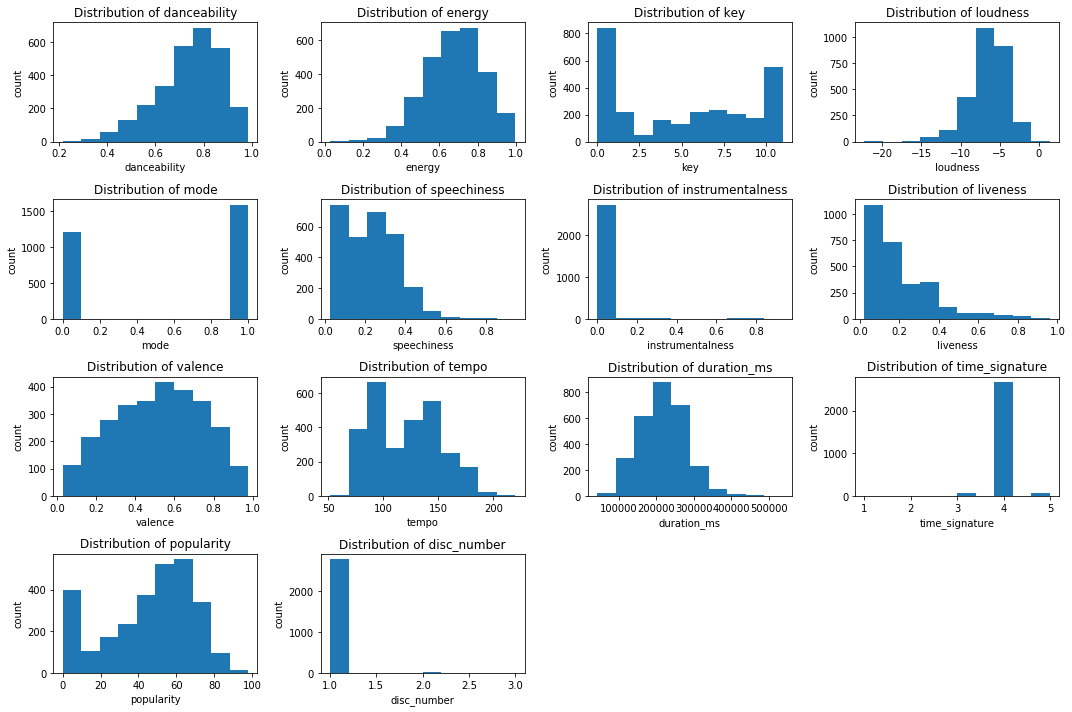

In [8]:
x = 1
plt.figure(figsize=(15,10))
for column in df.describe().columns:
    plt.subplot(4,4,x)
    plt.hist(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('count')
    x += 1
    
plt.tight_layout()

In [9]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,disc_number
count,2799.000000,2799.00000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000
mean,0.740040,0.67703,5.204001,-6.503821,0.566988,0.226766,0.011804,0.208430,0.516857,120.628911,217882.853876,4.000715,45.553769,1.008574
std,0.130724,0.14880,3.824908,2.465721,0.495581,0.130325,0.075835,0.160558,0.224448,30.487641,60501.132678,0.250802,24.084552,0.096015
min,0.215000,0.02790,0.000000,-22.282000,0.000000,0.024900,0.000000,0.023500,0.029400,51.539000,41507.000000,1.000000,0.000000,1.000000
25%,0.667500,0.57800,1.000000,-7.776000,0.000000,0.110000,0.000000,0.101000,0.346000,93.539000,174617.000000,4.000000,31.000000,1.000000
50%,0.760000,0.68600,5.000000,-6.211000,1.000000,0.226000,0.000000,0.143000,0.527000,120.026000,217954.000000,4.000000,51.000000,1.000000
75%,0.837000,0.78500,9.000000,-4.894000,1.000000,0.318500,0.000013,0.288000,0.695000,144.096000,257860.000000,4.000000,64.000000,1.000000
max,0.985000,0.99700,11.000000,1.421000,1.000000,0.947000,0.935000,0.962000,0.977000,220.251000,537813.000000,5.000000,98.000000,3.000000


## Look at Value Counts, are there any "weird" values?

In [10]:
for column in df.columns:
    print(column)
    print(df[column].value_counts(dropna=False))
    print('')

artist
$uicideBoy$         93
Various Artists     74
Ludacris            54
Lil Uzi Vert        48
XXXTENTACION        41
                    ..
Octavian             1
Pressa               1
Thomson & Ismael     1
Yung Beef            1
Young Problemz       1
Name: artist, Length: 869, dtype: int64

album
Greatest Hits                                 19
20 #1’s: Classic Hip Hop                      19
Eternal Atake                                 18
Luv Is Rage 2                                 16
I Want To Die In New Orleans                  14
                                              ..
Finally Rollin 2 (Glo'd Up Deluxe Edition)     1
Congrats Freestyle                             1
No Guidance (feat. Drake)                      1
The Leprechaun (Original Version)              1
About the Money (feat. Young Thug)             1
Name: album, Length: 1809, dtype: int64

release_date
2004-01-01    42
2005-01-01    39
2012-01-01    36
2006-01-01    33
2010-01-01    30
              .

## A few Nan values in:
- key
- loudness
- mode
- duration_ms
- time_signature
##### When df.dropnan(), we lose one observation, meaning all nulls were from this observation

In [11]:
df.track_name.value_counts().head(20)

Grillz                        5
Party Up                      4
Regulate                      3
Children's Story              3
Don't Sweat The Technique     3
Ruff Ryders' Anthem           3
Game Over                     3
Bring The Pain                3
Look At Me!                   3
Ride Wit Me                   3
Lean Back                     3
It Was A Good Day             3
Swang                         3
Country Grammar (Hot Shit)    3
N.Y. State of Mind            3
PRBLMS                        3
PTSD                          3
Boyz-N-The-Hood               3
Diamonds                      3
All The Way Turnt Up          2
Name: track_name, dtype: int64

## Some track_names are the same
- different artists released the same named song
- the same artist released the song again
- the smae artist released the song in a different album

In [12]:
df[df.track_name == 'all the way turnt up'].T

""
artist
album
release_date
track_name
track_id
danceability
energy
key
loudness
mode


## Convert duration_ms from miliseconds to seconds <a class="anchor" id="convert-time"></a>
- seconds = milliseconds ÷ 1,000
- maybe another column for minutes
    - minutes = seconds ÷ 60

In [13]:
df['duration_seconds'] = df.duration_ms / 1_000

In [14]:
df['duration_minutes'] = df.duration_seconds / 60

In [15]:
df[['duration_ms','duration_seconds','duration_minutes']].head()

,duration_ms,duration_seconds,duration_minutes
0,232803.0,232.803,3.880050
1,193920.0,193.920,3.232000
2,254390.0,254.390,4.239833
3,250493.0,250.493,4.174883
4,261933.0,261.933,4.365550


## Lower Case All Text Features <a class="anchor" id="lower-text"></a>
- lowercase a pandas series of text data with str.lower()

In [16]:
df.artist = df.artist.str.lower()

In [17]:
df.album = df.album.str.lower()

In [18]:
df.track_name = df.track_name.str.lower()

In [19]:
# check characters are lowercased
df[['artist','album','track_name']].head()

,artist,album,track_name
0,tay-k,trapman,trapman
1,lil wyte,doubt me now,oxy cotton
2,kamelen,kingpin slim,kingpin o.g - remix
3,waka flocka flame,flockaveli,grove st. party (feat. kebo gotti)
4,project pat,mista don't play: everythangs workin',don't save her (feat. crunchy black)


## is_featured_artist column? <a class="anchor" id="feat-artist"></a>
- boolean true is track name includes the words feat
- are there other variations in track name meaning featured artist?

In [20]:
df['is_featured_artist'] = df.track_name.str.contains('feat')

In [21]:
df.is_featured_artist.value_counts()

False    2221
True      578
Name: is_featured_artist, dtype: int64

## Split data into month, day, and year?

In [22]:
df = prepare.handle_nulls(df)

In [23]:
dates = df.release_date.str.split('-', expand=True)
dates.columns = ['release_year','release_month','release_day']
dates.index = df.index

In [24]:
df = pd.concat([df,dates], axis=1)

In [42]:
df

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
0,tay-k,trapman,2020-07-12,trapman,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2.0,-8.544,1.0,...,4.0,True,43.0,1.0,232.803,3.880050,False,2020,07,12
1,lil wyte,doubt me now,2003-03-04,oxy cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9.0,-6.912,1.0,...,4.0,True,61.0,1.0,193.920,3.232000,False,2003,03,04
2,kamelen,kingpin slim,2019-11-29,kingpin o.g - remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0.0,-6.450,0.0,...,4.0,True,22.0,1.0,254.390,4.239833,False,2019,11,29
3,waka flocka flame,flockaveli,2010-10-01,grove st. party (feat. kebo gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0.0,-4.783,0.0,...,4.0,True,62.0,1.0,250.493,4.174883,True,2010,10,01
4,project pat,mista don't play: everythangs workin',2001-02-13,don't save her (feat. crunchy black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11.0,-5.470,0.0,...,4.0,True,45.0,1.0,261.933,4.365550,True,2001,02,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,city girls,girl code,2018-11-16,twerk (feat. cardi b),4DyBx5MYoq8RsU33cEAIxT,0.788,0.841,4.0,-4.006,0.0,...,4.0,True,0.0,1.0,166.476,2.774600,True,2018,11,16
2796,nicki minaj,queen,2018-08-10,llc,3tCgn1QGWOZN5eE0XuVdrf,0.836,0.757,10.0,-5.441,0.0,...,4.0,True,46.0,1.0,221.853,3.697550,False,2018,08,10
2797,cardi b,invasion of privacy,2018-04-06,i do (feat. sza),1f5PNhkNgUpvDEeZfcIlO1,0.886,0.473,7.0,-7.338,0.0,...,4.0,True,68.0,1.0,200.205,3.336750,True,2018,04,06
2798,cardi b,money,2018-10-23,money,2GGMabyHXnJmjY6CXhhB2e,0.950,0.590,8.0,-6.508,0.0,...,4.0,True,78.0,1.0,183.527,3.058783,False,2018,10,23


In [25]:
df[['release_date','release_year','release_month','release_day']].head(10)

,release_date,release_year,release_month,release_day
0,2020-07-12,2020,07,12
1,2003-03-04,2003,03,04
2,2019-11-29,2019,11,29
3,2010-10-01,2010,10,01
4,2001-02-13,2001,02,13
5,2010-10-01,2010,10,01
6,2005-01-01,2005,01,01
7,2001-02-13,2001,02,13
8,2011-03-15,2011,03,15
9,2009-12-04,2009,12,04


## Split DF <a class="anchor" id="split-data"></a>
- using sklearn split functions to split df into 70% train, 20% validate, 10% test

In [26]:
# function to split data into train, validate, and test
def split_df(df):

    '''
    Splits dataframe into train, validate, and test - 70%, 20%, 10% respectively.
    Prints out the percentage shape and row/column shape of the split dataframes.
    Returns train, validate, test.
    '''

    # Import to use split function, can only split two at a time
    from sklearn.model_selection import train_test_split

    # First, split into train + validate together and test by itself
    # Test will be %10 of the data, train + validate is %70 for now
    # Set random_state so we can reproduce the same 'random' data
    train_validate, test = train_test_split(df, test_size = .10, random_state = 666)

    # Second, split train + validate into their seperate dataframes
    # Train will be %70 of the data, Validate will be %20 of the data
    # Set random_state so we can reproduce the same 'random' data
    train, validate = train_test_split(train_validate, test_size = .22, random_state = 666)

    # These two print functions allow us to ensure the date is properly split
    # Will print the shape of each variable when running the function
    print("train shape: ", train.shape, ", validate shape: ", validate.shape, ", test shape: ", test.shape)

    # Will print the shape of each variable as a percentage of the total data set
    # Variable to hold the sum of all rows (total observations in the data)
    total = df.count()[0]
    
    #calculating percentages of the split df to the original df
    train_percent = round(((train.shape[0])/total),2) * 100
    validate_percent = round(((validate.shape[0])/total),2) * 100
    test_percent = round(((test.shape[0])/total),2) * 100
    
    print("\ntrain percent: ", train_percent, ", validate percent: ", validate_percent, 
            ", test percent: ", test_percent)

    return train, validate, test

In [27]:
train, validate, test = split_df(df)

train shape:  (1964, 26) , validate shape:  (555, 26) , test shape:  (280, 26)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


## Scale the Data <a class="anchor" id="scale-data"></a>
- MinMaxScaler
    - a linear scaling method that transforms our features such that the range is between 0 and 1
    
- Standard
    - standardization is a linear transformation of our data such that is looks like the standard normal distribution
    - it will have a mean of 0 and a standard deviation of 1
    - scales and then centers
    
- RobustScaler
    - another linear transformation more robust to outliers
    
### Function to scale:
- takes train, validate, and test and returns the three scaled versions
- parameter for predict drops the specified predictive variable in the df, in this case popularity
- parameter for scaler specifies to use MinMax, Standard, or Robust Scaler

In [28]:
def scale_data(train, validate, test, predict, scaler):

    '''
    Scales a df based on scaler chosen: 'MinMax', 'Standard', or 'Robust'. 
    Needs three dfs, train, validate, and test. Fits the scaler object to train 
    only, transforms on all 3. Returns the three dfs scaled.
    '''
    
    import sklearn.preprocessing
    
    # removing predictive feature
    X_train = train.drop(predict, axis=1)
    X_validate = validate.drop(predict, axis=1)
    X_test = test.drop(predict, axis=1)
    
    if scaler == 'MinMax':

        # create scaler object for MinMax Scaler
        scaler = sklearn.preprocessing.MinMaxScaler()
        
    elif scaler == 'Standard':
        
        # create scaler object for Standard Scaler
        scaler = sklearn.preprocessing.StandardScaler()
        
    elif scaler == 'Robust':
        
        # create scaler object for Robust Scaler
        scaler = sklearn.preprocessing.StandardScaler()
        
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(X_train)

    # transforming all three dfs with the scaler object
    # this turns it into an array
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)

    # converting scaled array back to df
    # first by converting to a df, it will not have the original index and column names
    X_train_scaled = pd.DataFrame(X_train_scaled)
    X_validate_scaled = pd.DataFrame(X_validate_scaled)
    X_test_scaled = pd.DataFrame(X_test_scaled)
        
    # setting index to original dfs
    X_train_scaled.index = X_train.index
    X_validate_scaled.index = X_validate.index
    X_test_scaled.index = X_test.index
        
    # renaming columns to original dfs
    X_train_scaled.columns = X_train.columns
    X_validate_scaled.columns = X_validate.columns
    X_test_scaled.columns = X_test.columns

    return X_train_scaled, X_validate_scaled, X_test_scaled

In [29]:
train.describe().columns.to_list()

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'popularity',
 'disc_number',
 'duration_seconds',
 'duration_minutes']

In [30]:
# testing scaling on numeric columns
columns = train.describe().columns.to_list()
train = train[columns]
validate = validate[columns]
test = test[columns]

In [31]:
train

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,disc_number,duration_seconds,duration_minutes
2101,0.631,0.687,10.0,-7.870,0.0,0.3320,0.000,0.139,0.639,174.098,245693.0,4.0,0.0,1.0,245.693,4.094883
970,0.630,0.694,2.0,-6.593,1.0,0.3130,0.000,0.134,0.440,91.749,222249.0,4.0,58.0,1.0,222.249,3.704150
2028,0.924,0.645,10.0,-4.119,0.0,0.3030,0.000,0.161,0.299,133.948,237051.0,4.0,28.0,1.0,237.051,3.950850
1727,0.711,0.683,6.0,-5.039,1.0,0.0560,0.000,0.143,0.729,116.522,216483.0,4.0,60.0,1.0,216.483,3.608050
1976,0.865,0.687,10.0,-3.744,0.0,0.2170,0.000,0.158,0.486,139.023,242407.0,4.0,68.0,1.0,242.407,4.040117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.489,0.598,1.0,-4.929,1.0,0.0360,0.000,0.350,0.172,134.045,228373.0,3.0,2.0,1.0,228.373,3.806217
1953,0.500,0.592,6.0,-13.028,1.0,0.2990,0.155,0.323,0.574,122.550,185721.0,4.0,6.0,1.0,185.721,3.095350
2337,0.733,0.664,8.0,-6.163,1.0,0.2950,0.000,0.191,0.557,148.005,288133.0,4.0,72.0,1.0,288.133,4.802217
2166,0.771,0.416,0.0,-8.188,0.0,0.0894,0.000,0.111,0.218,131.952,246573.0,4.0,0.0,1.0,246.573,4.109550


In [32]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(train, validate, test, 'popularity','MinMax')

In [33]:
X_train_scaled

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,disc_number,duration_seconds,duration_minutes
2101,0.540260,0.680116,0.909091,0.608024,0.0,0.333044,0.000000,0.123069,0.643309,0.726439,0.411412,0.75,0.0,0.411412,0.411412
970,0.538961,0.687339,0.181818,0.661899,1.0,0.312439,0.000000,0.117741,0.433305,0.238335,0.364175,0.75,0.0,0.364175,0.364175
2028,0.920779,0.636776,0.909091,0.766274,0.0,0.301594,0.000000,0.146510,0.284508,0.488460,0.393999,0.75,0.0,0.393999,0.393999
1727,0.644156,0.675988,0.545455,0.727461,1.0,0.033727,0.000000,0.127331,0.738286,0.385171,0.352557,0.75,0.0,0.352557,0.352557
1976,0.844156,0.680116,0.909091,0.782095,0.0,0.208329,0.000000,0.143314,0.481849,0.518540,0.404791,0.75,0.0,0.404791,0.404791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.355844,0.588278,0.090909,0.732101,1.0,0.012038,0.000000,0.347896,0.150485,0.489035,0.376514,0.50,0.0,0.376514,0.376514
1953,0.370130,0.582086,0.545455,0.390415,1.0,0.297256,0.165775,0.319126,0.574715,0.420901,0.290575,0.75,0.0,0.290575,0.290575
2337,0.672727,0.656382,0.727273,0.680041,1.0,0.292918,0.000000,0.178476,0.556775,0.571779,0.496923,0.75,0.0,0.496923,0.496923
2166,0.722078,0.400475,0.000000,0.594608,0.0,0.069949,0.000000,0.093234,0.199029,0.476629,0.413185,0.75,0.0,0.413185,0.413185


## Checking Difference of Features Before and After Scaling

Text(0.5, 1.0, 'Distribution of Scaled Tempo')

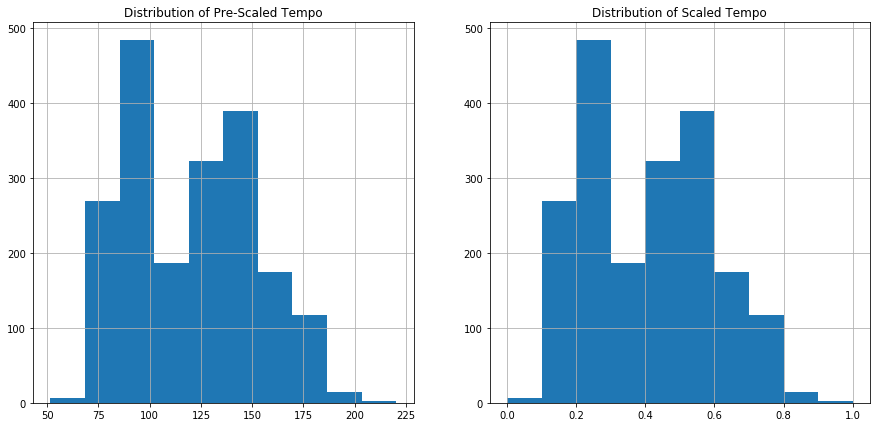

In [34]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
train.tempo.hist()
plt.title('Distribution of Pre-Scaled Tempo')

plt.subplot(1,2,2)
X_train_scaled.tempo.hist()
plt.title('Distribution of Scaled Tempo')

Text(0.5, 1.0, 'Distribution of Scaled Duration(ms)')

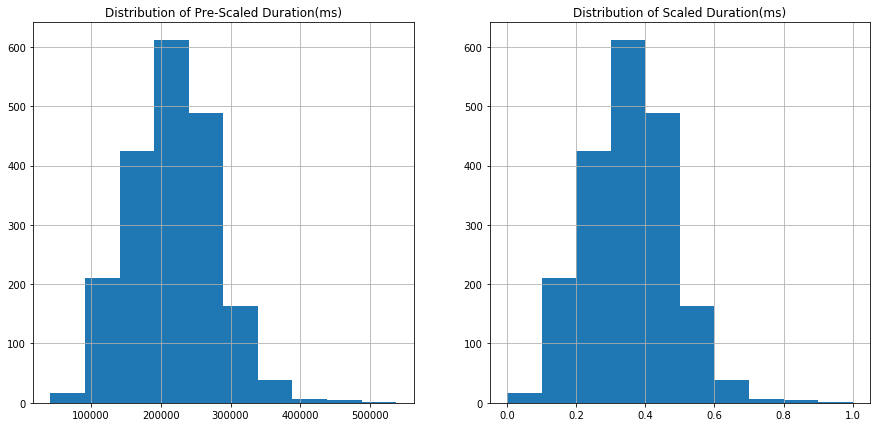

In [35]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
train.duration_ms.hist()
plt.title('Distribution of Pre-Scaled Duration(ms)')

plt.subplot(1,2,2)
X_train_scaled.duration_ms.hist()
plt.title('Distribution of Scaled Duration(ms)')

Text(0.5, 1.0, 'Distribution of Scaled Loudness')

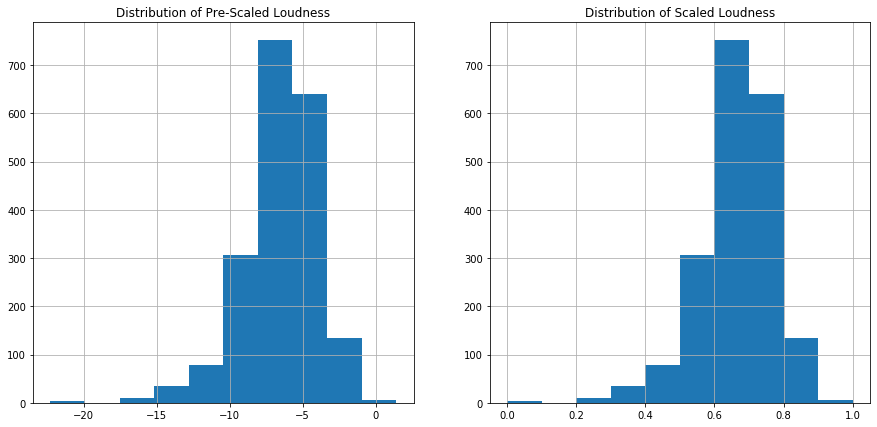

In [36]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
train.loudness.hist()
plt.title('Distribution of Pre-Scaled Loudness')

plt.subplot(1,2,2)
X_train_scaled.loudness.hist()
plt.title('Distribution of Scaled Loudness')

## What about features that appear to be scaled in the original data?

Text(0.5, 1.0, 'Distribution of Scaled Danceability')

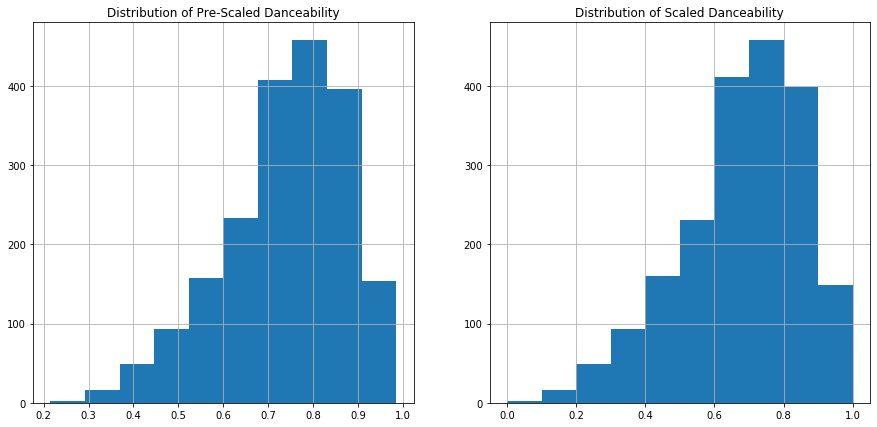

In [37]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
train.danceability.hist()
plt.title('Distribution of Pre-Scaled Danceability')

plt.subplot(1,2,2)
X_train_scaled.danceability.hist()
plt.title('Distribution of Scaled Danceability')

Text(0.5, 1.0, 'Distribution of Scaled Energy')

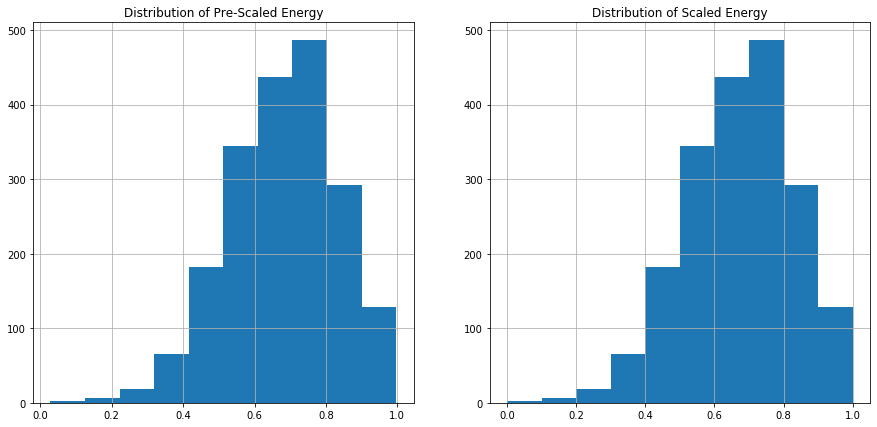

In [38]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
train.energy.hist()
plt.title('Distribution of Pre-Scaled Energy')

plt.subplot(1,2,2)
X_train_scaled.energy.hist()
plt.title('Distribution of Scaled Energy')

# Cluster Function <a class="anchor" id="cluster-data"></a>
- create clusters using kmeans modeling
- make into function that can be used on any features chosen throughout the project pipeline process
- with small amount of data, function works with train
    - not enough observations to create clusters on validate and test
    - commenting out validate and test for now

In [39]:
def create_clusters(X_train_scaled, X_validate_scaled, X_test_scaled, features, n, cluster_name):
    
    '''
    Create clusters based on features specified. n is amount of groups within the cluster.
    Best when used on scaled dfs. Returns dfs with dummy variables of clusters appended.
    '''
    
    from sklearn.cluster import KMeans

    X = X_train_scaled[features]
    Y = X_validate_scaled[features]
    Z = X_test_scaled[features]
    
    # create object with clusters chosen by n parameter
    kmeans = KMeans(n_clusters=n, random_state = 666)

    # fit to train only and the features chosen
    kmeans.fit(X)
    
    # add a column to the dfs of the prediction of cluster group
    X_train_scaled[cluster_name] = kmeans.predict(X)
    X_validate_scaled[cluster_name] = kmeans.predict(Y)
    X_test_scaled[cluster_name] = kmeans.predict(Z)
    
    
    # naming the cluster groups by cluster name plus numbers 1 through n for each group
    columns = []
    for x in range(1, n+1):
        columns.append(f'{cluster_name}_{x}')
    
    
    # create dataframe of dummy variables of cluster group created for each train, validate, test
    # train cluster dummy variables
    dummies = pd.get_dummies(X_train_scaled[cluster_name])
    dummies.columns = columns

    # validate cluster dummy variables
    dummies2 = pd.get_dummies(X_validate_scaled[cluster_name])
    dummies2.columns = columns

    # test cluster dummy variables
    dummies3 = pd.get_dummies(X_test_scaled[cluster_name])
    dummies3.columns = columns
    
    # add cluster dummy variables to scaled df
    # adding train cluster dummies to train scaled df
    X_train_scaled = pd.concat([X_train_scaled,dummies], axis=1)
    
    # adding validate cluster dummies to validate scaled df
    X_validate_scaled = pd.concat([X_validate_scaled,dummies2], axis=1)
    
    # adding test cluster dummies to test scaled df
    X_test_scaled = pd.concat([X_test_scaled,dummies3], axis=1)

    return X_train_scaled, X_validate_scaled, X_test_scaled

In [40]:
# testing on sample df
features = ['danceability','energy']
cluster_name = 'loud_and_duration_cluster'
n=4

create_clusters(X_train_scaled, X_validate_scaled, X_test_scaled, features, n, cluster_name)

(      danceability    energy       key  loudness  mode  speechiness  \
 2101      0.540260  0.680116  0.909091  0.608024   0.0     0.333044   
 970       0.538961  0.687339  0.181818  0.661899   1.0     0.312439   
 2028      0.920779  0.636776  0.909091  0.766274   0.0     0.301594   
 1727      0.644156  0.675988  0.545455  0.727461   1.0     0.033727   
 1976      0.844156  0.680116  0.909091  0.782095   0.0     0.208329   
 ...            ...       ...       ...       ...   ...          ...   
 1332      0.355844  0.588278  0.090909  0.732101   1.0     0.012038   
 1953      0.370130  0.582086  0.545455  0.390415   1.0     0.297256   
 2337      0.672727  0.656382  0.727273  0.680041   1.0     0.292918   
 2166      0.722078  0.400475  0.000000  0.594608   0.0     0.069949   
 1799      0.606494  0.510886  0.181818  0.531241   1.0     0.336298   
 
       instrumentalness  liveness   valence     tempo  duration_ms  \
 2101          0.000000  0.123069  0.643309  0.726439     0.4114

# Making a Function to Combine All CSV Files Into One <a class="anchor" id="combine-csv"></a>

In [41]:
def concat_csv_files():
    
    '''
    Loops through each csv file of acquired data to combine into one df.
    No parameters needed, only needs the files saved in the working directory.
    Returns the one df.
    '''
    
    # sets initial df as file of first 700 observations
    df = pd.read_csv('playlist-offset-0.csv', index_col=0)

    # loops through 700 - 600 by one hundreds, matching the csv file names
    # as it loops, it combines the csv file to the original df
    for offset in range(100, 2701, 100):
    
        # saves next csv file as a df
        add_df = pd.read_csv(f'playlist-offset-{offset}.csv', index_col=0)
    
        # adds the new df to the original df 
        df = pd.concat([df, add_df], ignore_index=True)
    
    # returns the csv files combined in one dataframe, should be 6_000 observations
    return df